<a href="https://colab.research.google.com/github/AnouarSeghaier/Linear_regression/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# load the libraries

In [ ]:
#importing the librraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import the data set

## Kaggle API access

In [ ]:
 # the Kaggle API client installion.
 !pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"medanouarseghaier","key":"203c287ae7e0cc315b3cbc46ea48d058"}'}

In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle .
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# List available datasets.
!kaggle datasets list

ref                                                             title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                       COVID-19 Dataset                                   5MB  2022-11-13 15:47:17          10717        314  1.0              
michals22/coffee-dataset                                        Coffee dataset                                    24KB  2022-12-15 20:02:12           1722         52  1.0              
thedevastator/jobs-dataset-from-glassdoor                       Salary Prediction                                  3MB  2022-11-16 13:52:31           6678        149  1.0              
thedevastator/unlock-profits-with-e-commerce-sales-data         E-Commerce 

In [ ]:
#Download data set
!kaggle datasets download -d devchauhan1/salary-datacsv

  0% 0.00/378 [00:00<?, ?B/s]
100% 378/378 [00:00<00:00, 360kB/s]


In [ ]:
! unzip salary-datacsv.zip

Archive:  salary-datacsv.zip
  inflating: Salary_Data.csv         


## Importing the data set

In [ ]:
salary_data=pd.read_csv('Salary_Data.csv')
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

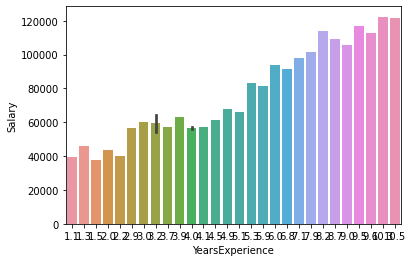

In [ ]:
sns.barplot(x='YearsExperience',y='Salary',data=salary_data)

# Split the data into traing set and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train , Y_test = train_test_split(X, Y , test_size = 1/3 ,random_state = 0)

# Fitting Simple Linear Regression to be the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

# Predicting the Test set results

In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

# the train set retsult Visualtion 

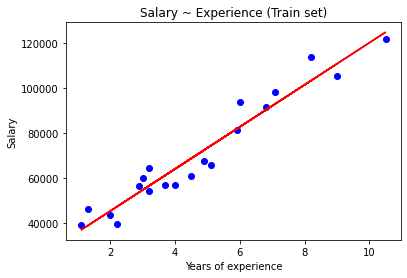

In [ ]:
plt.scatter(X_train, Y_train, color='blue')
plt.plot(X_train, lr.predict(X_train),color='red')
plt.title('Salary ~ Experience (Train set)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

# Finding the residuals

In [ ]:
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(Y_test,y_pred))
print('MSE: ', metrics.mean_squared_error(Y_test,y_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

MAE:  3426.4269374307078
MSE:  21026037.329511296
RMSE:  4585.4157204675885
